In this notebook we are going to discuss the steps followed in creating a deep learning model

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import keras and layers from tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
 # data importation
 data = pd.read_csv("/content/sample_data/california_housing_train.csv")
 data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# model creation

model = keras.Sequential([
    layers.Dense(units=512, activation="relu", input_shape = [8]),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=1)
])

Epoch 1/100
532/532 [==============================] - 4s 6ms/step - loss: 18686054400.0000
Epoch 2/100
532/532 [==============================] - 3s 6ms/step - loss: 10010522624.0000
Epoch 3/100
532/532 [==============================] - 4s 8ms/step - loss: 8407944192.0000
Epoch 4/100
532/532 [==============================] - 4s 7ms/step - loss: 7591015936.0000
Epoch 5/100
532/532 [==============================] - 3s 6ms/step - loss: 7103720960.0000
Epoch 6/100
532/532 [==============================] - 3s 6ms/step - loss: 6532861952.0000
Epoch 7/100
532/532 [==============================] - 4s 8ms/step - loss: 6244183040.0000
Epoch 8/100
532/532 [==============================] - 4s 7ms/step - loss: 5874112000.0000
Epoch 9/100
532/532 [==============================] - 3s 6ms/step - loss: 5842027520.0000
Epoch 10/100
532/532 [==============================] - 3s 6ms/step - loss: 5472628736.0000
Epoch 11/100
532/532 [==============================] - 4s 8ms/step - loss: 5277705728.

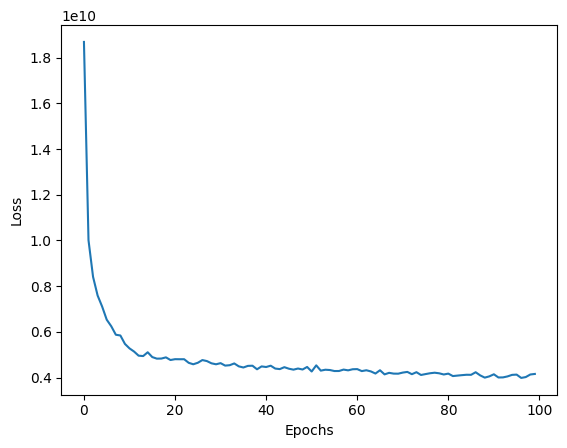

In [ ]:
# compile the model
model.compile(
    optimizer = "adam",
    loss = "mean_squared_error"
)

# fit the model to our data
history = model.fit(
    x = data.drop("median_house_value", axis = 1),
    y = data["median_house_value"],
    epochs = 100,
)

# plot the training loss of the model
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Epoch 1/50
532/532 [==============================] - 5s 7ms/step - loss: 19311550464.0000 - val_loss: 10869700608.0000
Epoch 2/50
532/532 [==============================] - 5s 9ms/step - loss: 10318966784.0000 - val_loss: 9402526720.0000
Epoch 3/50
532/532 [==============================] - 3s 6ms/step - loss: 8758982656.0000 - val_loss: 7811642880.0000
Epoch 4/50
532/532 [==============================] - 4s 7ms/step - loss: 7673321472.0000 - val_loss: 6924617728.0000
Epoch 5/50
532/532 [==============================] - 4s 7ms/step - loss: 7256984064.0000 - val_loss: 6836154368.0000
Epoch 6/50
532/532 [==============================] - 4s 8ms/step - loss: 6698118144.0000 - val_loss: 6448388608.0000
Epoch 7/50
532/532 [==============================] - 3s 6ms/step - loss: 6448299008.0000 - val_loss: 6611451904.0000
Epoch 8/50
532/532 [==============================] - 3s 7ms/step - loss: 6014447616.0000 - val_loss: 8607293440.0000
Epoch 9/50
532/532 [==============================] -

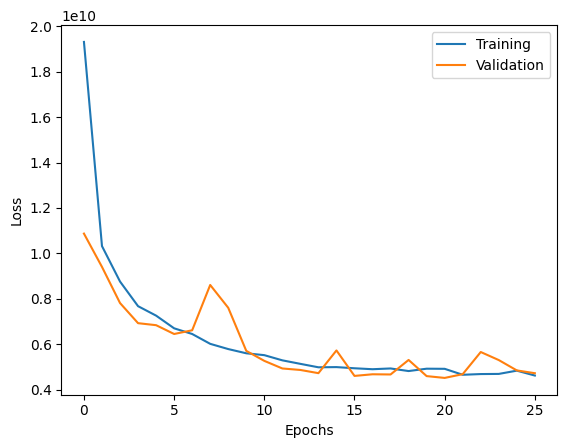

In [ ]:
# model creation

model_2 = keras.Sequential([
    layers.Dense(units=512, activation="relu", input_shape = [8]),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=1)
])

# compile the model
model_2.compile(
    optimizer = "adam",
    loss = "mean_squared_error"
)

# add early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True)


X_train = data.drop("median_house_value", axis = 1)
y_train = data["median_house_value"]

X_test = test_data.drop("median_house_value", axis = 1)
y_test = test_data["median_house_value"]

# fit the model to our data using training and validation data
history_2 = model_2.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping]
)

# plot the training and validation loss
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

In [ ]:
# print the r2 accuracy of the model on both the training and test set using
print(f"R2 score on training set: {model_2.evaluate(X_train, y_train)}")
print(f"R2 score on test set: {model_2.evaluate(X_test, y_test)}")

532/532 [==============================] - 2s 4ms/step - loss: 4462775808.0000
R2 score on training set: 4462775808.0
94/94 [==============================] - 0s 2ms/step - loss: 4539667968.0000
R2 score on test set: 4539667968.0
